In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib notebook

In [2]:

# Load data into dataframes
%time train = pd.read_csv(r'data/train.csv')
%time test = pd.read_csv(r'data/test.csv')
#Enrich
def enrich(df):
    df['Dates'] = pd.to_datetime(df.Dates)
    df['Year'] = df.Dates.dt.year
    df['Month'] = df.Dates.dt.month
    df['DayOfWeek'] = df.Dates.dt.dayofweek
    df['Day'] = df.Dates.dt.date #actual date without the hours

%time enrich(train)
%time enrich(test)

CPU times: user 2.87 s, sys: 236 ms, total: 3.11 s
Wall time: 3.86 s
CPU times: user 2.3 s, sys: 209 ms, total: 2.51 s
Wall time: 3.36 s
CPU times: user 5.39 s, sys: 236 ms, total: 5.63 s
Wall time: 5.68 s
CPU times: user 5.25 s, sys: 188 ms, total: 5.44 s
Wall time: 5.45 s


## Spacial Exploration

<IPython.core.display.Javascript object>


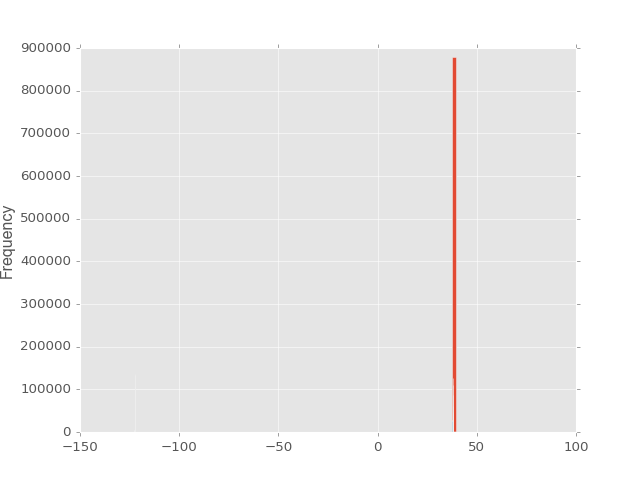

In [3]:
train.Y.plot.hist(bins=25)

In [4]:
#most of the Y's are below 40
#how many outliers are there?:
len(train[train.Y>40])

67

In [5]:
# let's get rid of the outliers and look at the histogram again
train = train[train.Y<40]
train.Y.plot.hist(bins=25)

In [6]:
#now let's look at the X axis
train.X.plot.hist(bins=25)

<IPython.core.display.Javascript object>


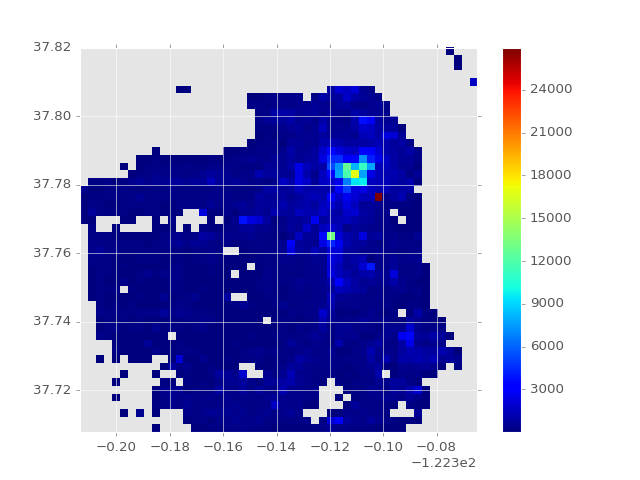

In [11]:
plt.figure()
plt.hist2d(train.X,train.Y,bins=50,cmin=10)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


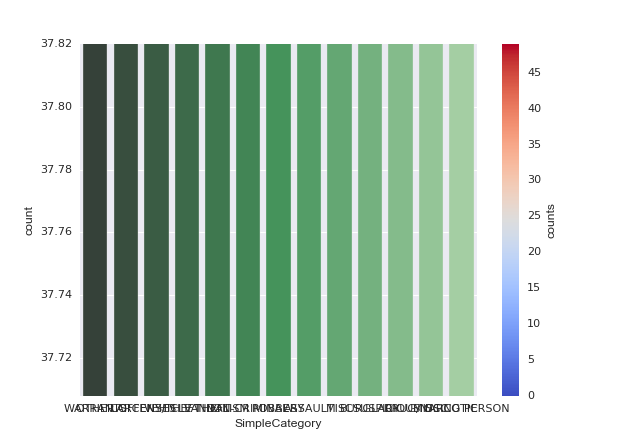

In [144]:
plt.figure()
plt.hexbin(train.X,train.Y,gridsize=50,bins=50, cmap=plt.cm.coolwarm)
plt.axis([train.X.min(), train.X.max(), train.Y.min(), train.Y.max()])
cb = plt.colorbar()
cb.set_label('counts')
plt.show()

## Temporal Exploration

In [31]:
### Hours

<IPython.core.display.Javascript object>


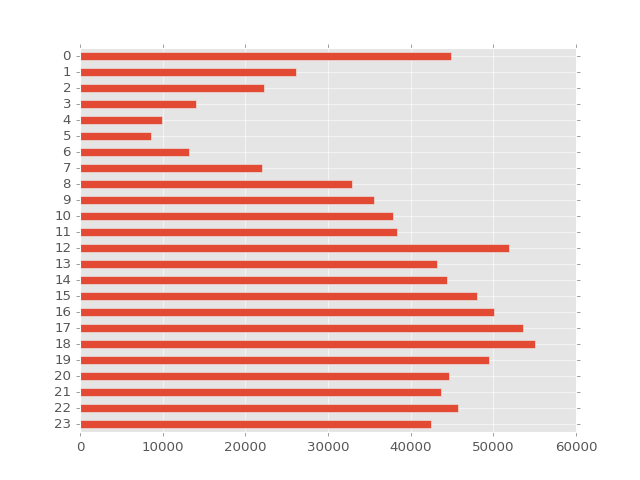

In [30]:
f = plt.figure()
hours = train.Dates.dt.hour.value_counts()
hours.sort_index(ascending=False,inplace=True)
hours.plot.barh()
plt.show()

### Monthly

<IPython.core.display.Javascript object>


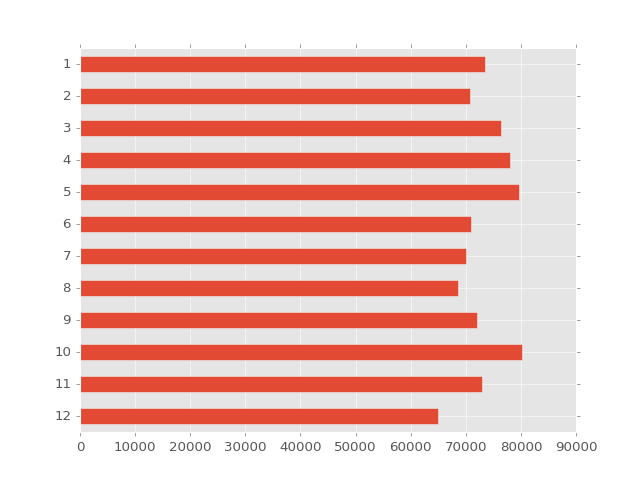

In [32]:
f = plt.figure()
hours = train.Month.value_counts()
hours.sort_index(ascending=False,inplace=True)
hours.plot.barh()
plt.show()

### Yearly

<IPython.core.display.Javascript object>


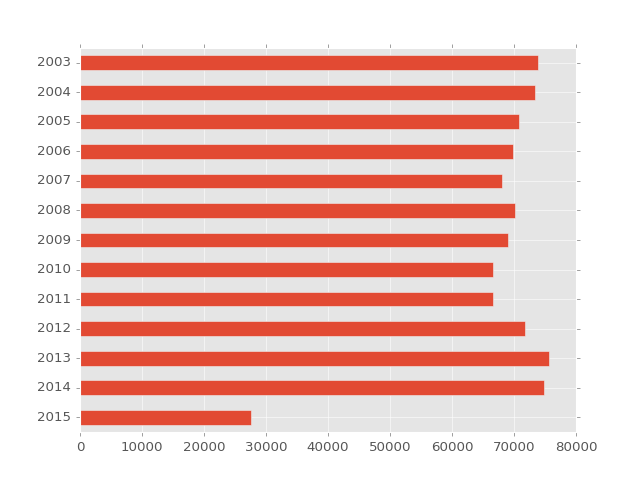

In [33]:
f = plt.figure()
hours = train.Year.value_counts()
hours.sort_index(ascending=False,inplace=True)
hours.plot.barh()
plt.show()

<IPython.core.display.Javascript object>


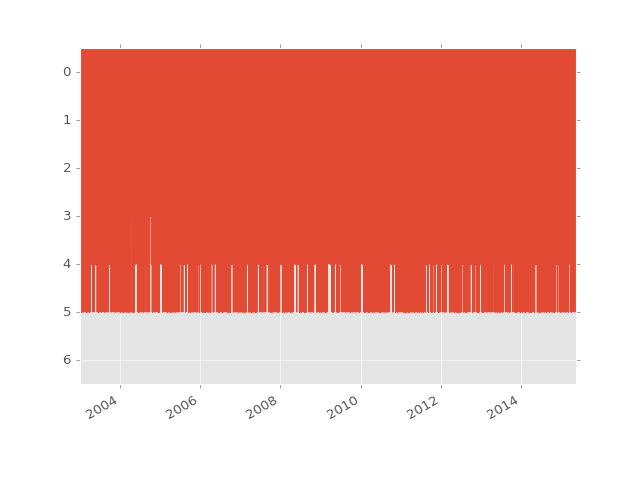

In [34]:
f = plt.figure()
hours = train.DayOfWeek.value_counts()
hours.sort_index(ascending=False,inplace=True)
hours.plot.barh()
plt.show()

In [40]:
from datetime import datetime 
%time train['DayWithHours'] = train.Dates.map(lambda dt : datetime(dt.year,dt.month,dt.day,dt.hour))


In [42]:
dayWithHours = train.DayWithHours.value_counts(sort=False)
dayWithHours.sort_index(inplace=True)
dayWithHours

2003-01-06 00:00:00    14
2003-01-06 01:00:00     6
2003-01-06 02:00:00    12
2003-01-06 03:00:00     3
2003-01-06 04:00:00     1
2003-01-06 05:00:00    10
2003-01-06 06:00:00     5
2003-01-06 07:00:00    10
2003-01-06 08:00:00    24
2003-01-06 09:00:00    16
2003-01-06 10:00:00    25
2003-01-06 11:00:00    29
2003-01-06 12:00:00    13
2003-01-06 13:00:00    16
2003-01-06 14:00:00    21
2003-01-06 15:00:00    15
2003-01-06 16:00:00    17
2003-01-06 17:00:00    29
2003-01-06 18:00:00    37
2003-01-06 19:00:00    22
2003-01-06 20:00:00    20
2003-01-06 21:00:00    14
2003-01-06 22:00:00    21
2003-01-06 23:00:00    20
2003-01-07 00:00:00    17
2003-01-07 01:00:00     8
2003-01-07 02:00:00     9
2003-01-07 03:00:00     6
2003-01-07 04:00:00     3
2003-01-07 05:00:00     2
                       ..
2015-05-12 18:00:00    18
2015-05-12 19:00:00    23
2015-05-12 20:00:00    16
2015-05-12 21:00:00    19
2015-05-12 22:00:00    22
2015-05-12 23:00:00     6
2015-05-13 00:00:00    11
2015-05-13 0

<IPython.core.display.Javascript object>


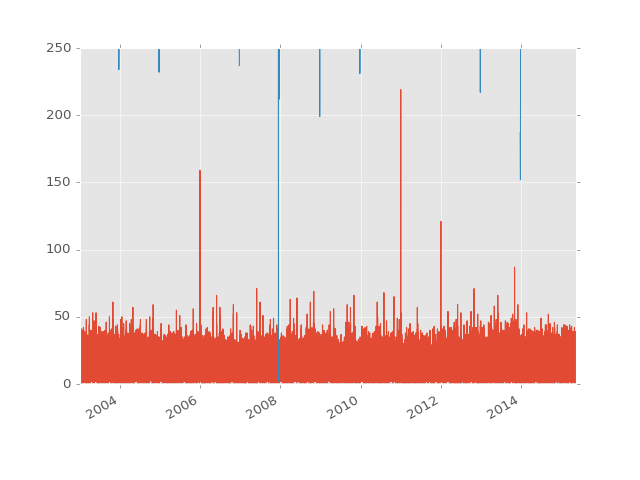

In [47]:
plt.figure()
dayWithHours.plot.line()
plt.show()

<IPython.core.display.Javascript object>


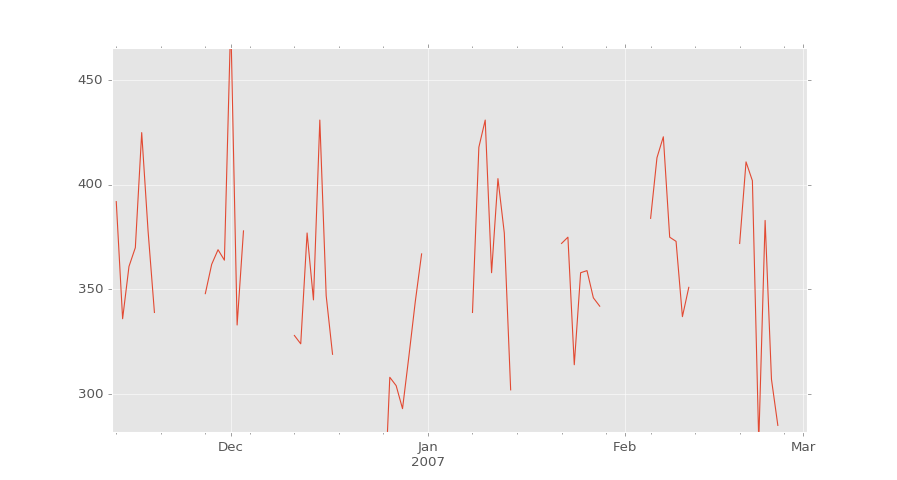

In [56]:
plt.figure()
days = dayWithHours.resample('D').sum()
days.plot.line()
plt.show()

<IPython.core.display.Javascript object>


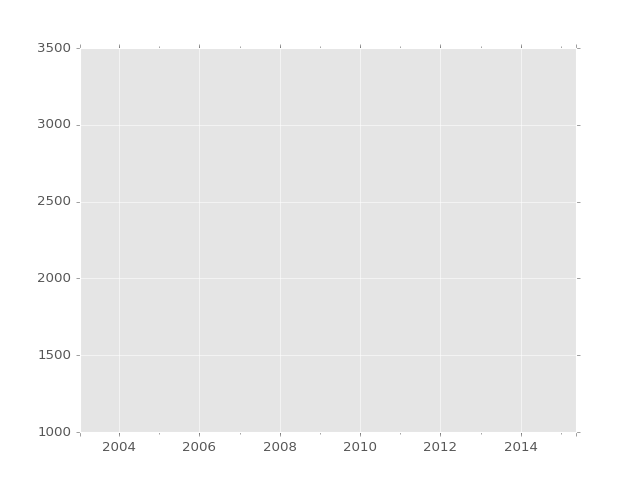

In [62]:
plt.figure()
days = dayWithHours.resample('W').sum()
days.plot.line()
plt.show()

<IPython.core.display.Javascript object>


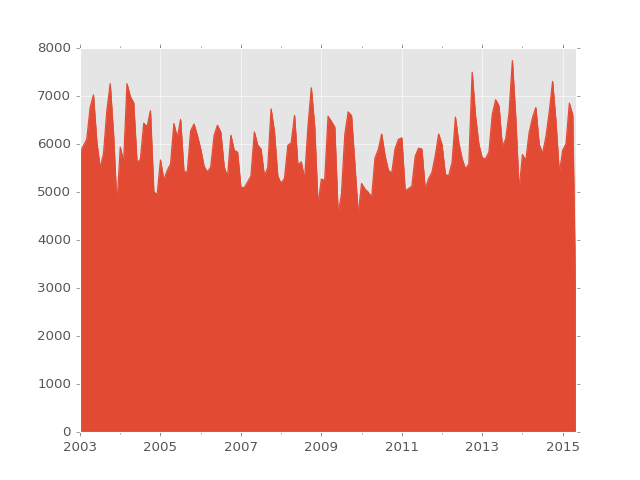

In [63]:
plt.figure()
days = dayWithHours.resample('M').sum()
days.plot.area()
plt.show()

## Crime Categories

In [72]:
categories = train.Category.value_counts()
categories

LARCENY/THEFT                  174885
OTHER OFFENSES                 126165
NON-CRIMINAL                    92300
ASSAULT                         76872
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53772
VANDALISM                       44724
WARRANTS                        42206
BURGLARY                        36754
SUSPICIOUS OCC                  31412
MISSING PERSON                  25989
ROBBERY                         22999
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7325
STOLEN PROPERTY                  4539
SEX OFFENSES FORCIBLE            4387
DISORDERLY CONDUCT               4318
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [100]:
catpct = categories/categories.sum()

print(catpct[:12].sum()) 
cats = catpct[:12].index.tolist()
cats

0.8907346619862365


['LARCENY/THEFT',
 'OTHER OFFENSES',
 'NON-CRIMINAL',
 'ASSAULT',
 'DRUG/NARCOTIC',
 'VEHICLE THEFT',
 'VANDALISM',
 'WARRANTS',
 'BURGLARY',
 'SUSPICIOUS OCC',
 'MISSING PERSON',
 'ROBBERY']

In [103]:
%time train['SimpleCategory'] = train.Category.map(lambda c: c if c in cats else 'MISC')
train.SimpleCategory.value_counts()

CPU times: user 453 ms, sys: 9.65 ms, total: 463 ms
Wall time: 464 ms


LARCENY/THEFT     174885
OTHER OFFENSES    126165
MISC               95933
NON-CRIMINAL       92300
ASSAULT            76872
DRUG/NARCOTIC      53971
VEHICLE THEFT      53772
VANDALISM          44724
WARRANTS           42206
BURGLARY           36754
SUSPICIOUS OCC     31412
MISSING PERSON     25989
ROBBERY            22999
Name: SimpleCategory, dtype: int64

<IPython.core.display.Javascript object>


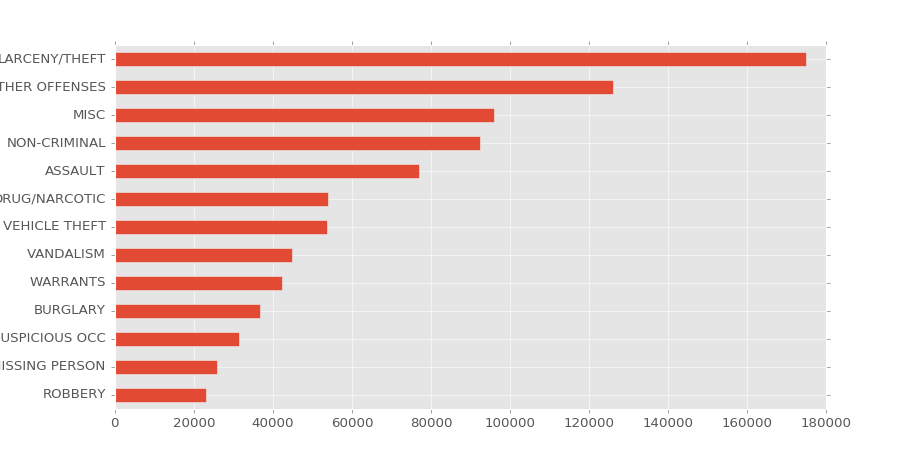

In [108]:
plt.figure()
train.SimpleCategory.value_counts(ascending=True).plot.barh()
plt.show()

In [111]:
%time train['Monthly'] = train.Dates.map(lambda dt: datetime(dt.year, dt.month, 1))

CPU times: user 6.56 s, sys: 220 ms, total: 6.78 s
Wall time: 6.79 s


In [122]:
categoryByMonth = train.groupby(['Monthly','SimpleCategory']).count().unstack()['X']
categoryByMonth

SimpleCategory,ASSAULT,BURGLARY,DRUG/NARCOTIC,LARCENY/THEFT,MISC,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,ROBBERY,SUSPICIOUS OCC,VANDALISM,VEHICLE THEFT,WARRANTS
Monthly,,,,,,,,,,,,,
2003-01-01,507,223,455,962,633,157,455,966,120,162,258,515,418
2003-02-01,490,231,505,1037,617,163,478,952,126,181,241,553,389
2003-03-01,579,270,287,1125,643,150,580,863,146,164,295,665,332
2003-04-01,545,303,476,1226,800,176,605,826,156,163,320,765,396
2003-05-01,636,305,467,1191,804,157,674,948,149,221,304,748,420
2003-06-01,536,206,380,1142,655,151,549,875,125,189,302,569,366
2003-07-01,484,211,321,988,622,140,478,749,133,156,242,607,371
2003-08-01,478,238,380,1029,610,139,559,791,127,174,259,623,391
2003-09-01,620,219,447,1135,816,160,580,966,135,203,250,753,419


<IPython.core.display.Javascript object>


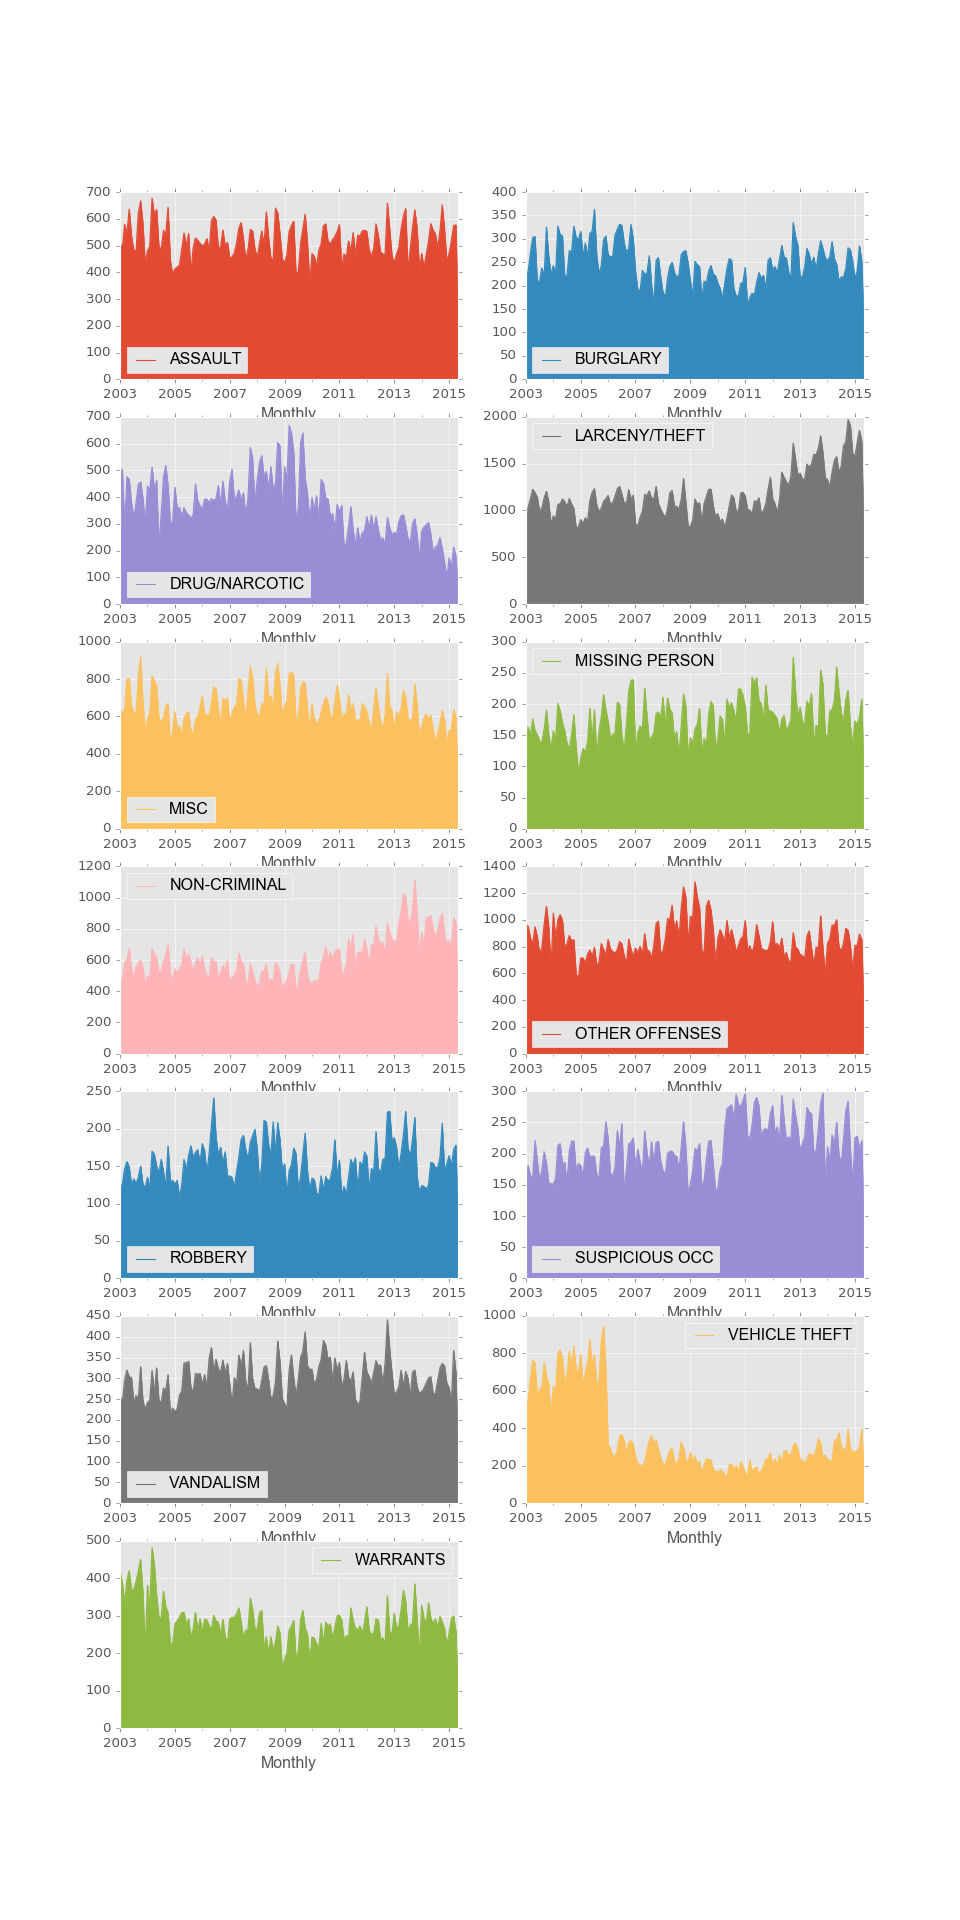

In [138]:
ax = categoryByMonth.plot.area(subplots=True,layout=(7,2),figsize=(12, 24),sharex=False)

# SEABORN

In [141]:
import seaborn as sns


<IPython.core.display.Javascript object>


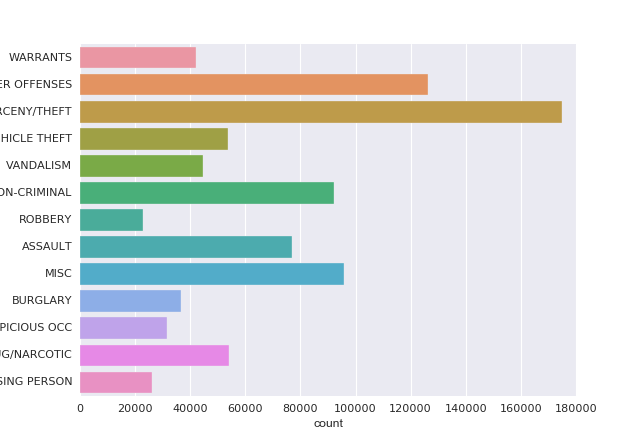

In [160]:
plt.figure()
sns.countplot(y="SimpleCategory", data=train);
plt.show()

<IPython.core.display.Javascript object>


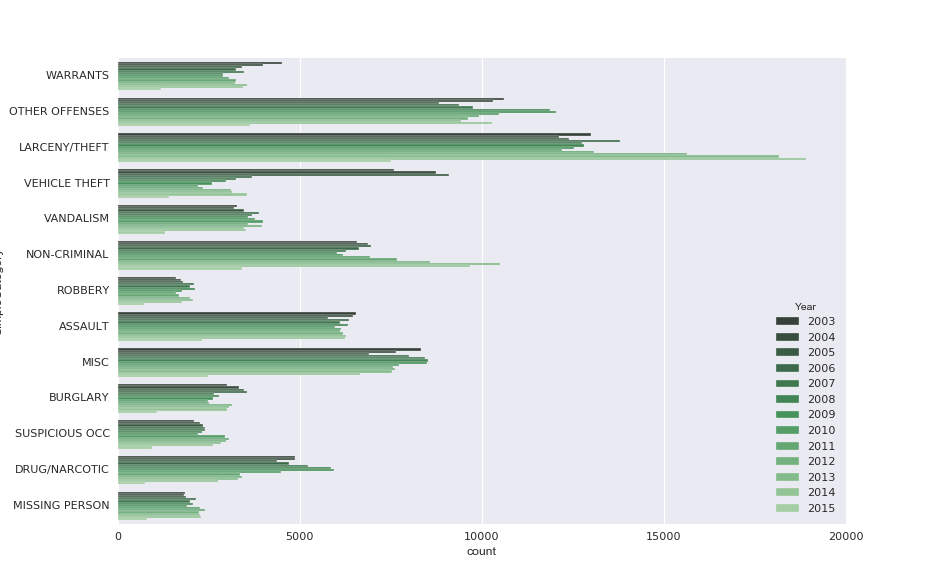

In [162]:
plt.figure()
sns.countplot(y="SimpleCategory",hue='Year', palette="Greens_d", data=train);
plt.show()

<IPython.core.display.Javascript object>


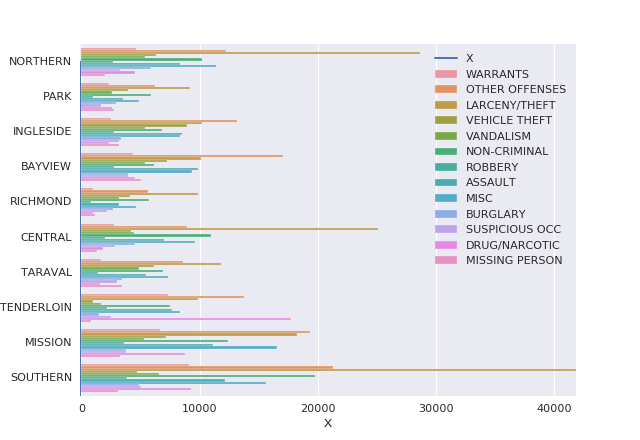

In [165]:
plt.figure()
sns.countplot(hue="SimpleCategory",y='PdDistrict', data=train);
plt.show()

<IPython.core.display.Javascript object>


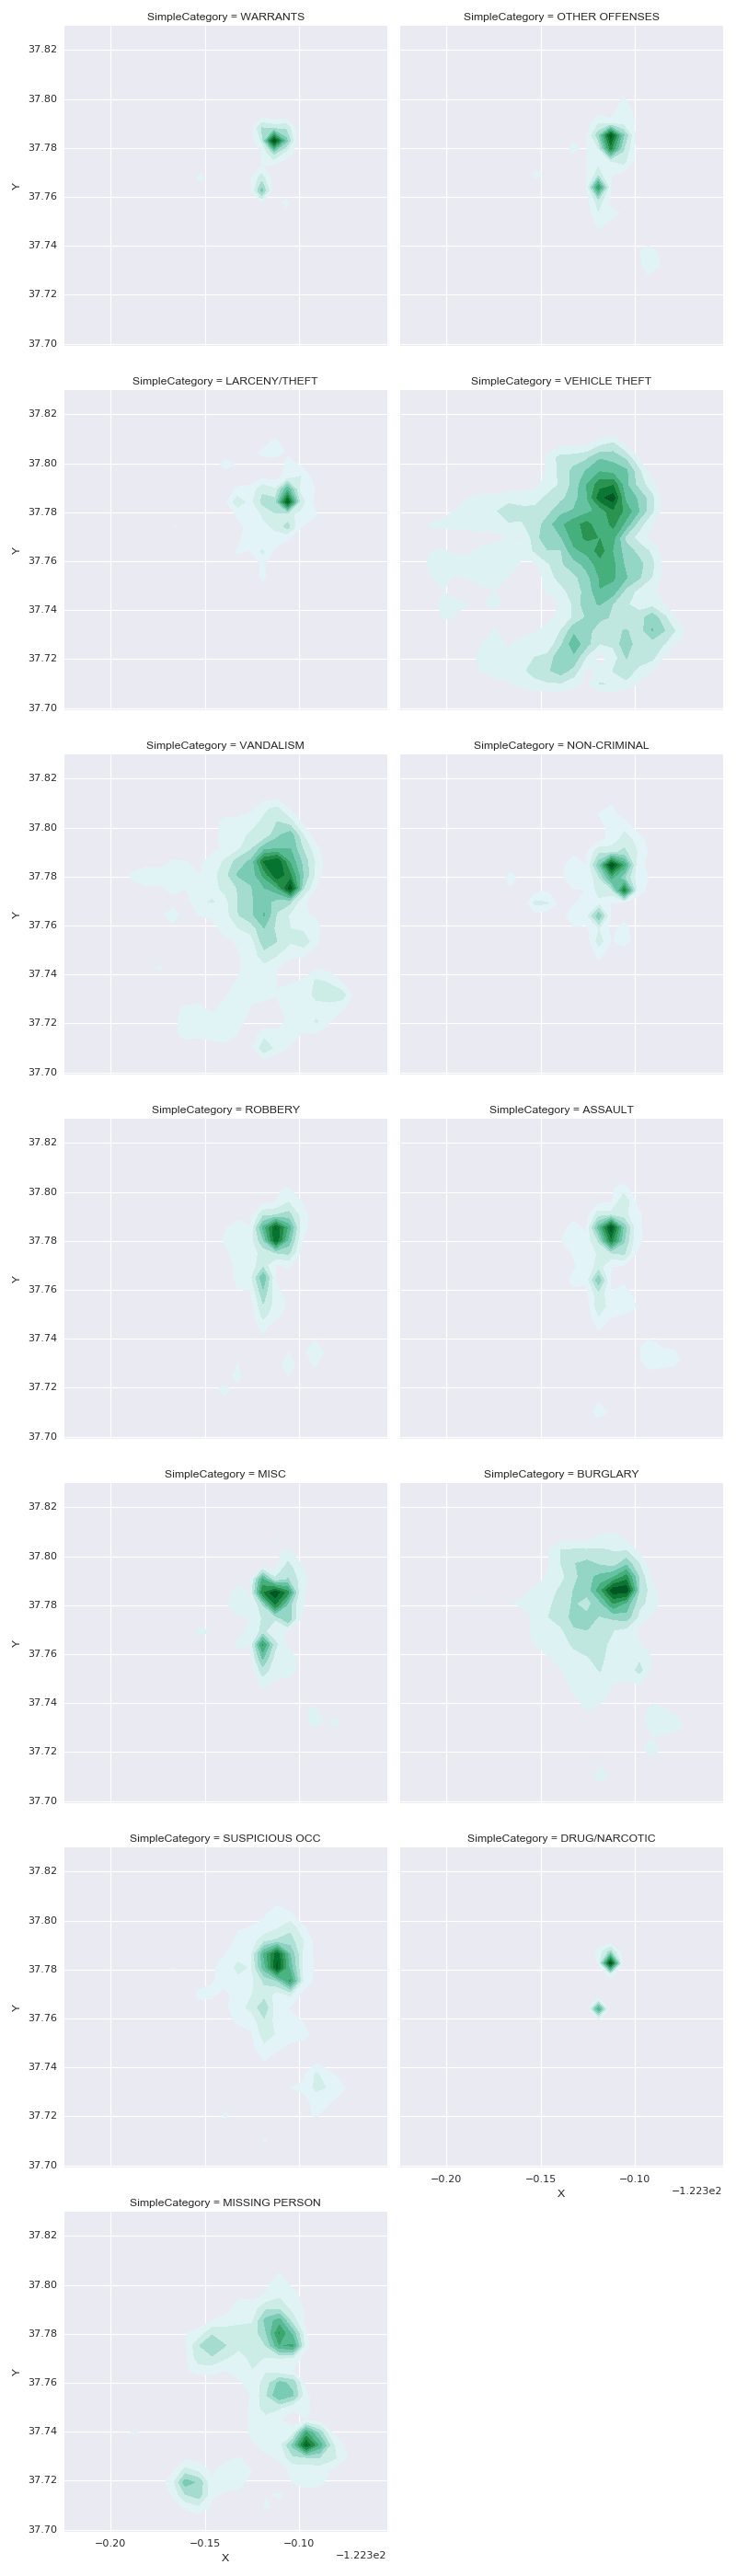

CPU times: user 1min 3s, sys: 6.62 s, total: 1min 9s
Wall time: 1min 11s


In [194]:

# misc = train[train.SimpleCategory=='MISC']
clipsize = [[-122.5247, -122.3366],[ 37.699, 37.8299]]
g= sns.FacetGrid(train, col="SimpleCategory", col_wrap=2,size=5)
# %time sns.kdeplot(misc.X,misc.Y,shade=True, shade_lowest=False,gridsize=30, clip=clipsize)
%time ax = g.map(sns.kdeplot, "X", "Y", shade=True, shade_lowest=False,gridsize=25, clip=clipsize)

<IPython.core.display.Javascript object>


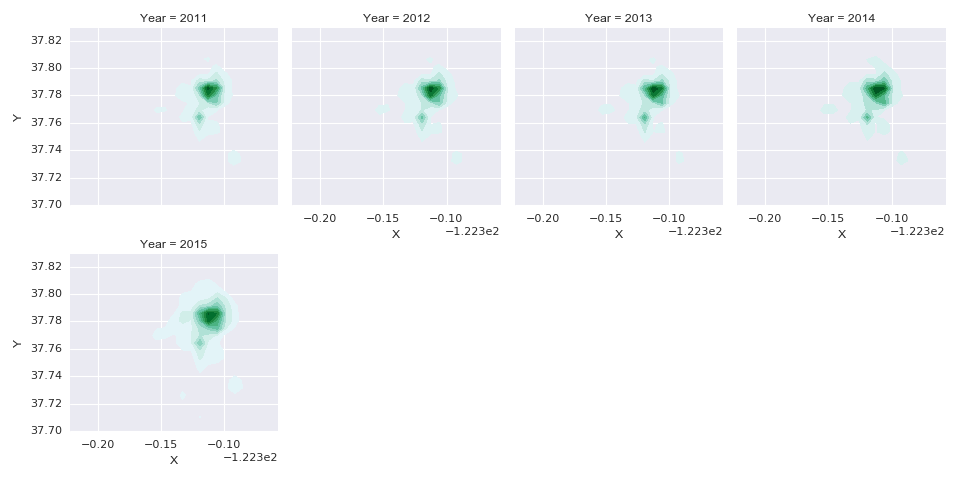

CPU times: user 21.8 s, sys: 1.62 s, total: 23.4 s
Wall time: 23.6 s


In [198]:
# theft = train[train.SimpleCategory=='LARCENY/THEFT']
clipsize = [[-122.5247, -122.3366],[ 37.699, 37.8299]]
g= sns.FacetGrid(train[train.Year>2010], col="Year", col_wrap=4)
# %time sns.kdeplot(misc.X,misc.Y,shade=True, shade_lowest=False,gridsize=30, clip=clipsize)
%time ax = g.map(sns.kdeplot, "X", "Y", shade=True, shade_lowest=False,gridsize=25, clip=clipsize)

<IPython.core.display.Javascript object>


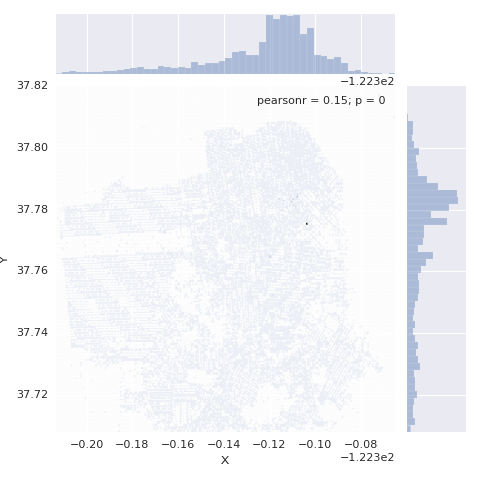

In [203]:
g = sns.jointplot("X", "Y", data=train, bins=20, kind="hex")

In [209]:
g= sns.FacetGrid(train, col="SimpleCategory",col_wrap=2)
# %time sns.kdeplot(misc.X,misc.Y,shade=True, shade_lowest=False,gridsize=30, clip=clipsize)
%time ax = g.map(sns.jointplot, "X", "Y", bins=20, kind="hex")

<IPython.core.display.Javascript object>

/Users/mtimet/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 